In [1]:
'''
This is the submission template for the students
'''
# Place your imports here
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [2]:
file_q1q2 = 'News.RTRS.200809.0214.txt'
file_q3 = 'News.RTRS.202006.0214.txt'
lm_dict_file = 'Loughran-McDonald_MasterDictionary_1993-2021.csv'

In [3]:
class CalculatorException(Exception):
    """A class to throw if you come across incorrect syntax or other issues"""
    def __init__(self, value):
        self.value = value

    def __str__(self):
        return repr(self.value)

In [3]:
def test_q1a_specific(self):
    """
    now answer this question by hard-coding your results: 
    How many articles are there in the JSON file for September 2008?
    """
    # TODO: Implement me, return by hard-coding the answer
    return 287688

def test_q1a_generic(self, filename: str):
    """
    now answer this question: 
    How many articles are there in the JSON file named "filename"?
    """
    # TODO: Implement me, work out the generic codes to load the file and return the answer
    fp = open(filename, 'r')
    data=json.load(fp)
    return len(data['Items'])

In [4]:
print('Q1 (a):')
num1 = test_q1a_specific(0)
num2 = test_q1a_generic(0,file_q1q2)
print('specific case:', num1)
print('generic case:', num2)

Q1 (a):
specific case: 287688
generic case: 287688


In [5]:
def test_q1b_specific(self):
    """
    now answer this question by hard-coding your results: 
    How many of articles in the JSON file for September 2008 are in English?
    """
    # TODO: Implement me, return by hard-coding the answer
    return 189911

def test_q1b_generic(self, filename: str):
    """
    now answer this question: 
    How many of articles in the JSON file named "filename" are in English?
    """
    # TODO: Implement me, work out the generic codes to load the file and return the answer
    fp = open(filename, 'r')
    data=json.load(fp)
    return len([el for el in data['Items'] if el['data']['language'] == 'en'])

print('Q1 (b):')
num1 = test_q1b_specific(0)
num2 = test_q1b_generic(0,file_q1q2)
print('specific case:', num1)
print('generic case:', num2)


Q1 (b):
specific case: 189911
generic case: 189911


In [6]:
def test_q1c_specific(self):
    """
    now answer this question by hard-coding your results: 
    In the JSON file for September 2008, how many English-language articles in this month mention any of the five companies: C.N, JPM.N, BAC.N, GS.N and MS.N?
    """
    # TODO: Implement me, return by hard-coding the answer
    num = 5649
    return num

def test_q1c_generic(self, filename: str):
    """
    now answer this question: 
    In the JSON file named "filename", how many English-language articles in this month mention any of the five companies: C.N, JPM.N, BAC.N, GS.N and MS.N?
    """
    # TODO: Implement me, work out the generic codes to load the file and return the answer
    fp = open(filename, 'r')
    data = json.load(fp)
    fc = set(['R:C.N','R:JPM.N','R:BAC.N','R:GS.N','R:MS.N'])
 
    return len([el for el in data['Items'] if ((el['data']['language'] == 'en') and (len(set(el['data']['subjects']) & fc) > 0))])


print('Q1 (c):')
num1 = test_q1c_specific(0)
num2 = test_q1c_generic(0,file_q1q2)
print('specific case:', num1)
print('generic case:', num2)

Q1 (c):
specific case: 5649
generic case: 5649


In [7]:
def test_q1d_specific(self):
    """
    now answer this question by hard-coding your results: 
    In the JSON file for September 2008:
    Find all English-language articles in the month with at least 1,800 characters in their body, and that are tagged as being about Lehman Brothers (ticker LEH.N). (You'll find that many of these articles have duplicated altId's.) Now for each altId that appears in these articles (i.e., for each unique article chain), find the first article in the chain. Sort all these first-in-chain articles by their versionCreated date, and show the versionCreated dates and headlines of the first and last three of these articles in the month.
    """
    # TODO: Implement me, return by hard-coding the answer
    # the first and last three versionCreated dates
    # return an np.array of strings
    version_first3 = np.array(['2008-09-01T00:37:25.000Z', '2008-09-01T01:17:04.000Z', '2008-09-01T09:59:15.000Z'])
    version_last3 = np.array(['2008-09-30T20:50:37.000Z', '2008-09-30T15:58:12.000Z', '2008-09-30T13:29:56.000Z'])
    # the first and last three headlines
    # return an np.array of strings
    headline_first3 = np.array(['PRESS DIGEST - South Korean newspapers - Sept 1', 'UPDATE 1-Lehman in talks with KDB to raise $6 bln-Telegraph', 'TAKE-A-LOOK-Ongoing major Asia M&A deals'])
    headline_last3 = np.array(['S&P: 3 LEHMAN BROS F-R COMM MTG TR 2007-LLF C5 RTGS ON WTCHNEG', 'FUND VIEW-Aviva Investors buys junk debt as spreads soar', "S&P CUTS, WITHDRAWS RTGS ON LEHMAN BROS. TREASURY CO.'S NTS"])
    

    return [version_first3, version_last3, headline_first3, headline_last3]

def test_q1d_generic(self, filename: str):
    """
    now answer this question: 
    In the JSON file named "filename":
    Find all English-language articles in the month with at least 1,800 characters in their body, and that are tagged as being about Lehman Brothers (ticker LEH.N). (You'll find that many of these articles have duplicated altId's.) Now for each altId that appears in these articles (i.e., for each unique article chain), find the first article in the chain. Sort all these first-in-chain articles by their versionCreated date, and show the versionCreated dates and headlines of the first and last three of these articles in the month.
    """
    # TODO: Implement me, work out the generic codes to load the file and return the answer
    fp = open(filename, 'r')
    data = json.load(fp)

    articleid = [el['data']['altId'] for el in data['Items'] if el['data']['language']=='en' and \
            'R:LEH.N' in el['data']['subjects'] and len(el['data']['body']) > 1800]
    
    f_art = []
    for altid in set(articleid):
        chain = [(altid, el['data']['versionCreated'],el['data']['headline']) for el in data['Items'] if el['data']['altId']==altid]
        sorted_chain = sorted(chain,key=lambda xx: xx[1])
        f_art.append(sorted_chain[0])
    
    f_art = sorted(f_art,key=lambda xx: xx[1])
    f_art = np.array(f_art)
    # the first and last three versionCreated dates
    # return an np.array of strings
    version_first3 = np.array([f_art[:3][i][1] for i in range(3)])
    version_last3 =  np.array([f_art[-3:][-i][1] for i in range(1,4)])
    # the first and last three headlines
    # return an np.array of strings
    headline_first3 = np.array([f_art[:3][i][2] for i in range(3)])
    headline_last3 = np.array([f_art[-3:][-i][2] for i in range(1,4)])
    
    return [version_first3, version_last3, headline_first3, headline_last3]


print('Q1 (d):')
num1 = test_q1d_specific(0)
num2 = test_q1d_generic(0,file_q1q2)
print('specific case:', num1)
print('generic case:', num2)

Q1 (d):
specific case: [array(['2008-09-01T00:37:25.000Z', '2008-09-01T01:17:04.000Z',
       '2008-09-01T09:59:15.000Z'], dtype='<U24'), array(['2008-09-30T20:50:37.000Z', '2008-09-30T15:58:12.000Z',
       '2008-09-30T13:29:56.000Z'], dtype='<U24'), array(['PRESS DIGEST - South Korean newspapers - Sept 1',
       'UPDATE 1-Lehman in talks with KDB to raise $6 bln-Telegraph',
       'TAKE-A-LOOK-Ongoing major Asia M&A deals'], dtype='<U59'), array(['S&P: 3 LEHMAN BROS F-R COMM MTG TR 2007-LLF C5 RTGS ON WTCHNEG',
       'FUND VIEW-Aviva Investors buys junk debt as spreads soar',
       "S&P CUTS, WITHDRAWS RTGS ON LEHMAN BROS. TREASURY CO.'S NTS"],
      dtype='<U62')]
generic case: [array(['2008-09-01T00:37:25.000Z', '2008-09-01T01:17:04.000Z',
       '2008-09-01T09:59:15.000Z'], dtype='<U24'), array(['2008-09-30T20:50:37.000Z', '2008-09-30T15:58:12.000Z',
       '2008-09-30T13:29:56.000Z'], dtype='<U24'), array(['PRESS DIGEST - South Korean newspapers - Sept 1',
       'UPDATE 1-Leh

In [8]:
def test_q2_getdata(self, data):
    '''
    (optional)
    Implement a generic function that loads the EM articles in the loaded JSON file.
    specifically, the function 
        - takes the loaded json file (by json.load) as the input and 
        - returns the indices for the EM articles as an np.array
    You may need this function to make the rest of the codes for Q2 more compact (see test_q2a_generic for more details)
    '''
    # TODO: implement me
    countrys = set(['N2:BR','N2:MX','N2:TR','N2:ZA'])
    
    return np.array([i for i,el in enumerate(data['Items']) if el['data']['language']=='en' and (len(countrys & set(el['data']['subjects'])) > 0)])

def test_q2a_specific(self):
    """
    now answer this question by hard-coding your results: 
    How many EM articles are there in the JSON file for September 2008?
    """
    # TODO: Implement me, return by hard-coding the answer
    return 6915

def test_q2a_generic(self, filename: str):
    """
    now answer this question: 
    How many EM articles are there in the JSON file named "filename"?
    """
    # TODO: 
    # This function is already complete, and you only need to implement the "test_q2_getdata" method
    # An alternative is to implement your own codes if you prefer not to work with "test_q2_getdata"
    fp = open(filename, 'r')
    data = json.load(fp)
    idx = test_q2_getdata(0,data)
    return len(idx)

print('Q2 (a):')
num1 = test_q2a_specific(0)
num2 = test_q2a_generic(0,file_q1q2)
print('specific case:', num1)
print('generic case:', num2)


Q2 (a):
specific case: 6915
generic case: 6915


In [12]:
def analyzer(txt, stem=True):
    '''
    (optional)
    you may want to implement an analyzer that conducts prelimanry cleaning of the data
    this method is proposed to help you streamline the codes and is optional
    '''
    # TODO: implement the following:
    # lowercase
    # replace special characters and punctuations
    # replace white spaces 
    # replace numbers 
    # remove stop words
    txt = re.sub('[0-9][.,0-9]*','_n_',txt)
    stemmer = SnowballStemmer('english')
    analyzer = CountVectorizer(stop_words='english').build_analyzer()
    if stem:
        # this makes your analyzer more generic
        # in the sentiment analysis, you don't want to stem the words
        return [stemmer.stem(wrd) for wrd in analyzer(txt)]
    return [wrd for wrd in analyzer(txt)]

def test_q2b_specific(self):
    """
    now answer this question by hard-coding your results:
    In the JSON file for September 2008:
    What are the 25 most frequently occurring tokens (words or symbols that may not have been captured by the data cleaning step) in each month? 
    """
    # TODO: Implement me, return by hard-coding the answer
    # return an np.array of strings, each corresponding to the words
    topwords = np.array(['_n_', 'reuter','said', 'com', 'percent', 'market', 'price',
                            'year', 'gold', 'sept','report', 'bank' ,'news', 'pct' ,
                            'keyword', 'net' ,'south', 'messag', 'africa', 'new',
                            'rate', 'oil', 'mexico' ,'trade','week'])
    return topwords


def test_q2b_generic(self, filename: str):
    """
    now answer this question: 
    In the JSON file named "filename":
    What are the 25 most frequently occurring tokens (words or symbols that may not have been captured by the data cleaning step) in each month? 
    """
    # TODO: Implement me, work out the generic codes to load the file and return the answer
    fp = open(filename, 'r')
    data = json.load(fp)
    idx = test_q2_getdata(0,data)
    els = [data['Items'][i] for i in idx]
    cv = CountVectorizer(tokenizer= analyzer)
    dtm_raw = cv.fit_transform([el['data']['body'] for el in els if el['data']['body'] != ''])

    freq = dtm_raw.sum(axis=0)
    nfreq = [(wrd,freq[0,idx]) for wrd,idx in cv.vocabulary_.items()]
    nfreq = sorted(nfreq,key = lambda xx: xx[1],reverse=True)

    # return an np.array of strings, each corresponding to the words
    topwords = np.array([nfreq[i][0] for i in range(25)])
    return topwords

print('Q2 (b):')
num1 = test_q2b_specific(0)
num2 = test_q2b_generic(0,file_q1q2)
print('specific case:', num1)
print('generic case:', num2)


Q2 (b):


NameError: name 'test_q2_getdata' is not defined

In [10]:
def test_q2c_specific(self):
    """
    now answer this question by hard-coding your results:
    In the JSON file for September 2008:
    For the 100 most frequently appearing tokens, sort the tokens by frequency of occurrence from highest to lowest. What fraction of all token occurrences are accounted for by the top 100 tokens?
    """
    # TODO: Implement me, return by hard-coding the answer
    # hint: you might want to hard-code the frequencies instead of the fractions for better precision
    top_freq = np.array([0.3056224,  0.05262709, 0.03006504, 0.02317345, 0.02301426, 0.0175116,\
 0.01525055, 0.01380163, 0.01278647, 0.0124427 , 0.01214968, 0.01090841,
 0.01050696, 0.01021856, 0.00998553, 0.00974789, 0.00921724, 0.00892884,
 0.00891038, 0.00882502, 0.00875119, 0.00771756, 0.00769218, 0.00744993,
 0.00727689, 0.00724459, 0.00714769, 0.00700464, 0.0068962 , 0.00685929,
 0.00676008, 0.00671163, 0.00644399, 0.00627787, 0.00604485, 0.00579336,
 0.00577952, 0.00572876, 0.00569646, 0.00569415, 0.00567339, 0.00554188,
 0.00540345, 0.00540114, 0.00521887, 0.00519119, 0.00518657, 0.00517965,
 0.00516119, 0.00508505, 0.00501353, 0.00501353, 0.00500892, 0.00497431,
 0.00484511, 0.00483588, 0.00483588, 0.00481281, 0.0047459 , 0.00474128,
 0.00467207, 0.00460747, 0.00454517, 0.00444596, 0.00441828, 0.0043606,
 0.00435829, 0.0042983 , 0.00429599, 0.00426831, 0.00420601, 0.0042014,
 0.00415064, 0.00412988, 0.00394069, 0.00387147, 0.00387147, 0.00386455,
 0.00384378, 0.00384148, 0.00384148, 0.00383686, 0.0038161 , 0.00380687,
 0.00377688, 0.00377226, 0.00374227, 0.00373073, 0.00372612, 0.00370766,
 0.00367536, 0.0036569 , 0.00364998, 0.00360845, 0.00358538, 0.00354385,
 0.00351155, 0.00344695, 0.00342618, 0.00341234])
    return top_freq/sum(top_freq)


def test_q2c_generic(self, filename: str):
    """
    now answer this question: 
    In the JSON file named "filename":
    For the 100 most frequently appearing tokens, sort the tokens by frequency of occurrence from highest to lowest. What fraction of all token occurrences are accounted for by the top 100 tokens?
    """
    # TODO: Implement me, work out the generic codes to load the file and return the answer
    fp = open(filename, 'r')
    data = json.load(fp)
    idx = test_q2_getdata(0,data)
    els = [data['Items'][i] for i in idx]
    cv = CountVectorizer(tokenizer= analyzer)
    dtm_raw = cv.fit_transform([el['data']['body'] for el in els if el['data']['body'] != ''])

    freq = dtm_raw.sum(axis=0)
    nfreq = [(wrd,freq[0,idx]) for wrd,idx in cv.vocabulary_.items()]
    nfreq = sorted(nfreq,key = lambda xx: xx[1],reverse=True)

    # return an np.array of strings, each corresponding to the words
    top_freq = np.array([nfreq[i][1] for i in range(100)])
    # return topwords
    return top_freq/sum(top_freq)

print('Q2 (c):')
num1 = test_q2c_specific(0)
num2 = test_q2c_generic(0,file_q1q2)
print('specific case:', num1)
print('generic case:', num2)

Q2 (c):
specific case: [0.30562239 0.05262709 0.03006504 0.02317345 0.02301426 0.0175116
 0.01525055 0.01380163 0.01278647 0.0124427  0.01214968 0.01090841
 0.01050696 0.01021856 0.00998553 0.00974789 0.00921724 0.00892884
 0.00891038 0.00882502 0.00875119 0.00771756 0.00769218 0.00744993
 0.00727689 0.00724459 0.00714769 0.00700464 0.0068962  0.00685929
 0.00676008 0.00671163 0.00644399 0.00627787 0.00604485 0.00579336
 0.00577952 0.00572876 0.00569646 0.00569415 0.00567339 0.00554188
 0.00540345 0.00540114 0.00521887 0.00519119 0.00518657 0.00517965
 0.00516119 0.00508505 0.00501353 0.00501353 0.00500892 0.00497431
 0.00484511 0.00483588 0.00483588 0.00481281 0.0047459  0.00474128
 0.00467207 0.00460747 0.00454517 0.00444596 0.00441828 0.0043606
 0.00435829 0.0042983  0.00429599 0.00426831 0.00420601 0.0042014
 0.00415064 0.00412988 0.00394069 0.00387147 0.00387147 0.00386455
 0.00384378 0.00384148 0.00384148 0.00383686 0.0038161  0.00380687
 0.00377688 0.00377226 0.00374227 0.003730

Q2 (d):


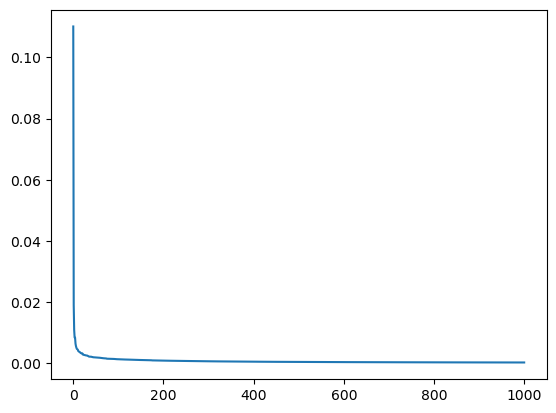

In [11]:
def test_q2d_open(self, filename: str):
    """
    now answer this question: question 2 part d
    """
    # TODO: implement me
    # apart from finishing the codes here, please also upload the graph named "q2d.png" as a part of the submission. 
    fp = open(filename, 'r')
    fig, ax = plt.subplots()
    data = json.load(fp)
    idx = test_q2_getdata(0,data)
    els = [data['Items'][i] for i in idx]
    cv = CountVectorizer(tokenizer= analyzer)
    dtm_raw = cv.fit_transform([el['data']['body'] for el in els if el['data']['body'] != ''])

    freq = dtm_raw.sum(axis=0)
    nfreq = [(wrd,freq[0,idx]) for wrd,idx in cv.vocabulary_.items()]
    nfreq = sorted(nfreq,key = lambda xx: xx[1],reverse=True)
    freq = np.array([el[1] for el in nfreq])
    freq = freq/sum(freq)
    plt.plot(freq[:1001])
    plt.show()


print('Q2 (d):')
test_q2d_open(0,file_q1q2)

In [12]:
def test_q2e_specific(self):
    """
    now answer this question by hard-coding your results:
    In the JSON file for September 2008: answer Question 2 part e
    """
    # TODO: Implement me, return by hard-coding the answer

    return np.array([0.16657939, 1.06916973])


def test_q2e_generic(self, filename: str, lm_dict_file = 'Loughran-McDonald_MasterDictionary_1993-2021.csv'):
    """
    now answer this question: 
    In the JSON file named "filename": answer Question 2 part e
    """
    # TODO: Implement me, work out the generic codes to load the file and return the answer
    lm_dict = pd.read_csv(lm_dict_file)
    lm_dict = lm_dict.dropna()
    lm_dict['Word'] = lm_dict.apply(lambda df: df['Word'].lower(), axis=1)
    pos = set(lm_dict[lm_dict['Positive']>0]['Word'])
    neg = set(lm_dict[lm_dict['Negative']>0]['Word'])
    fp = open(filename, 'r')
    data = json.load(fp)
    idx = test_q2_getdata(0,data)
    els = [data['Items'][i] for i in idx]

    score_list = []
    pos_list = []
    neg_list = []

    for el in els:

        anz = analyzer(el['data']['body'],stem = False)
        if len(anz) == 0:
            score_list.append(0)
            pos_list.append(0)
            neg_list.append(0)

            continue
        pos_num = sum(token in pos for token in anz )
        neg_num = sum(token in neg for token in anz ) 
        # print(pos_num,neg_num)
        score = (pos_num - neg_num)/len(anz)
        pos_pct = pos_num/len(anz) 
        neg_pct = neg_num/len(anz)

        score_list.append(score)
        pos_list.append(pos_pct)
        neg_list.append(neg_pct)

    vpos = np.var(pos_list)
    vneg = np.var(neg_list)
    cov = float(np.cov(pos_list,neg_list)[0,1])
    vscore = vpos + vneg - 2 * cov
    
    pos_var_percentage = vpos/vscore
    neg_var_percentage = vneg/vscore

    return np.array([pos_var_percentage, neg_var_percentage])



print('Q2 (e):')
num1 = test_q2e_specific(0)
num2 = test_q2e_generic(0,file_q1q2, lm_dict_file)
print('specific case:', num1)
print('generic case:', num2)

Q2 (e):
specific case: [0.16657939 1.06916973]
generic case: [0.16657939 1.06916973]


In [13]:
def test_q2f_specific(self):
    """
    now answer this question by hard-coding your results:
    In the JSON file for September 2008: 
    For articles between 300 and 500 words in length (this is the length after stop words have been dropped), find the headlines of the 5 most negative and most positive sentiment articles. (It is okay if some of these articles have duplicated altId's.)
    """
    # TODO: Implement me, return by hard-coding the answer
    # return an np.array of strings
    top5_hl = np.array(["TEXT-Moody's release on Banco Fibra SA",
    'WRAPUP 1-Soccer-UEFA Cup relief for Milan and Ancelotti',
    'TEXT-Fitch release on Finansbank A.S.',
    "TEXT-Fitch may raise Brazil's Company SA",
    'TEXT-S&P report on Turkish transparency and disclosure survey'])
    bot5_hl = np.array(["FACTBOX-S.Africa's Zuma seeks dismissal of graft charges",
    'INSTANT VIEW-Reaction to dismissal of case against Zuma',
    'Media-government tensions flare in Turkey',
    'Media-government tensions flare in Turkey',
    'Mexico peso slammed by bailout fears, stocks down'])
    return top5_hl, bot5_hl


def test_q2f_generic(self, filename: str, lm_dict_file: str):
    """
    now answer this question: 
    In the JSON file named "filename":
    For articles between 300 and 500 words in length (this is the length after stop words have been dropped), find the headlines of the 5 most negative and most positive sentiment articles. (It is okay if some of these articles have duplicated altId's.)
    """
    # TODO: Implement me, work out the generic codes to load the file and return the answer
    lm_dict = pd.read_csv(lm_dict_file)
    lm_dict = lm_dict.dropna()
    lm_dict['Word'] = lm_dict.apply(lambda df: df['Word'].lower(), axis=1)
    pos = set(lm_dict[lm_dict['Positive']>0]['Word'])
    neg = set(lm_dict[lm_dict['Negative']>0]['Word'])

    fp = open(filename, 'r')
    data = json.load(fp)
    idx = test_q2_getdata(0,data)
    els = [data['Items'][i] for i in idx]

    els3_5 = [el for el in els if len(analyzer(el['data']['body'],stem = False)) >= 300 and len(analyzer(el['data']['body'],stem = False)) <= 500 ]

    sentilist = []
    for el in els3_5:
        anz = analyzer(el['data']['body'],stem = False)
        pos_num = sum(token in pos for token in anz )
        neg_num = sum(token in neg for token in anz ) 
        score = (pos_num - neg_num)/len(anz)
        sentilist.append((el['data']['headline'],score))
    print(pos_num,neg_num)
    sorted_sent = sorted(sentilist,key=lambda xx: xx[1],reverse = True)
    
    # return an np.array of strings
    top5_hl = np.array([sorted_sent[i][0] for i in range(5)])
    bot5_hl = np.array([sorted_sent[-i][0] for i in range(1,6)])

    return top5_hl, bot5_hl


print('Q2 (f):')
num1 = test_q2f_specific(0)
num2 = test_q2f_generic(0,file_q1q2, lm_dict_file)
print('specific case:', num1)
print('generic case:', num2)

Q2 (f):
9 6
specific case: (array(["TEXT-Moody's release on Banco Fibra SA",
       'WRAPUP 1-Soccer-UEFA Cup relief for Milan and Ancelotti',
       'TEXT-Fitch release on Finansbank A.S.',
       "TEXT-Fitch may raise Brazil's Company SA",
       'TEXT-S&P report on Turkish transparency and disclosure survey'],
      dtype='<U61'), array(["FACTBOX-S.Africa's Zuma seeks dismissal of graft charges",
       'INSTANT VIEW-Reaction to dismissal of case against Zuma',
       'Media-government tensions flare in Turkey',
       'Media-government tensions flare in Turkey',
       'Mexico peso slammed by bailout fears, stocks down'], dtype='<U56'))
generic case: (array(["TEXT-Moody's release on Banco Fibra SA",
       'WRAPUP 1-Soccer-UEFA Cup relief for Milan and Ancelotti',
       'TEXT-Fitch release on Finansbank A.S.',
       "TEXT-Fitch may raise Brazil's Company SA",
       'TEXT-S&P report on Turkish transparency and disclosure survey'],
      dtype='<U61'), array(["FACTBOX-S.Africa's Z

In [9]:
def test_q3_getdata(self, data):
    '''
    (optional)
    Implement a generic function that loads the English language articles that mention the words "COVID" or "coronavirus" in their body
    specifically, the function 
        - takes the loaded json file (by json.load) as the input and 
        - returns the indices for the covid articles.
    You may need this function to make the rest of the codes for Q3 more compact
    '''
    # TODO: implement me
    data2 = [i for i,el in enumerate(data['Items']) if el['data']['language'] == 'en' and ('coronavirus' in el['data']['body'].lower()) or ('covid' in el['data']['body'].lower())]
    return data2


def test_q3a_generic(self, filename: str):
    """
    now answer this question: 
    How many articles did you locate that satisfy the search criteria in the JSON file named "filename"?
    """
    # TODO: This function is already complete, and you need to implement the "test_q3_getdata" method
    # An alternative is to implement your own codes if you prefer not to work with "test_q2_getdata"
    fp = open(filename, 'r')
    data = json.load(fp)
    idx = test_q3_getdata(0,data)
    return len(idx)

print('Q3 (a):')
num = test_q3a_generic(0,file_q3)
print(num)

Q3 (a):
59322


In [14]:

def test_q3b_generic(self, filename: str):
    """
    now answer this question: 
    For the JSON file named "filename", 
    Find the 1000 most frequently occurring words. Show the top and bottom most frequent words from this list of 100
    """
    # TODO: implement me
    fp = open(filename, 'r')
    data = json.load(fp)
    idx = test_q3_getdata(0,data)
    covidel = [data['Items'][i] for i in idx]
    cv = CountVectorizer(tokenizer= analyzer)    
    dtm_raw_covid = cv.fit_transform([el['data']['body'] for el in covidel if el['data']['body'] != ''])
    
    freq = dtm_raw_covid.sum(axis=0)
    nfreq = [(wrd,freq[0,idx]) for wrd,idx in cv.vocabulary_.items()]  
    nfreq = sorted(nfreq, key = lambda xx: xx[1], reverse=True)

    topwords = np.array(nfreq[:1000])
    botwords = np.array(nfreq[-1000:])
    
    return [topwords, botwords]


print('Q3 (b):')
tops = test_q3b_generic(0,file_q3)
print(tops)


Q3 (b):


/Users/wolong/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[array([['_n_', '1158550'],
       ['news', '382350'],
       ['rate', '193719'],
       ...,
       ['dijo', '2871'],
       ['sentiment', '2868'],
       ['spain', '2860']], dtype='<U21'), array([['pratfal', '1'],
       ['edberg', '1'],
       ['sasgroup', '1'],
       ...,
       ['einst', '1'],
       ['ns_n_n_n_d_n_f', '1'],
       ['joust', '1']], dtype='<U47')]


In [ ]:
def test_q3c_generic(self, filename: str):
    """
    now answer this question: 
    For the JSON file named "filename", 
    Show the output of the model estimation as a list of the 20 words in each topic that have the highest topic-word probability
    return as a dictionary of the following format
    """
    # TODO: implement me
    fp = open(filename, 'r')
    data = json.load(fp)
    idx = self.test_q3_getdata(data)
    covidel = [data['Items'][i] for i in idx]
    cv = CountVectorizer(tokenizer= self.analyzer)  
    
    dtm_raw = cv.fit_transform([el['data']['body'] for el in covidel])
    Nwrds = 1000
    freq = dtm_raw.sum(axis=0)
    top_words = [(wrd,idx,freq[0,idx]) for wrd,idx in cv.vocabulary_.items()]  
    top_words = sorted(top_words, key = lambda xx: xx[2], reverse=True)[:Nwrds]
    words_ordered = [wrd for wrd,_,_ in top_words]
    
    
    lda = LDA(n_components=10,learning_method='batch',max_iter=50)
    lda.fit(dtm_raw)
    
    topwords = dict()
    
    for ii in range(len(lda.components_)):
        tot_refs = sum(lda.components_[ii]) ## this comes back as a word count
        ## need to normalize to get the probabilities
        topic = [(wrd,refs/tot_refs) for wrd,refs in zip(words_ordered,lda.components_[ii])]
        ## sort by probability
        topic = sorted(topic,key = lambda xx: xx[1],reverse=True)
        topwords[ii+1] = [wrd for wrd,prob in topic[:20]]

    
    lda10 = None
    feature_names = np.array([])
    
    # the ideal outputs for the purpose of being used later in q3d are respectivley:
    #     topwords: this is what we need to grade this question, so make sure this is correct
    #     lda10: the instance of the trained lda model (optional)
    #     feature_names: the words associated with the model (optional)
    # the last two are designed to help you make your codes more compact
    # it's okay if you want to opt out of the last two outputs: just keep them empty as None and an empty array
    return [topwords, lda10, feature_names]


print('Q3 (c):')
topwords, lda10, feature_names = test_q3c_generic(0,file_q3)
print(topwords)

Q3 (c):


NameError: name 'calc' is not defined

In [ ]:



class CalculatorException(Exception):
    """A class to throw if you come across incorrect syntax or other issues"""
    def __init__(self, value):
        self.value = value

    def __str__(self):
        return repr(self.value)


class hm_textAn(object):
    """
    This is the class you need to finish. 
    """
    def analyzer(self, txt, stem=True):
        '''
        (optional)
        you may want to implement an analyzer that conducts prelimanry cleaning of the data
        this method is proposed to help you streamline the codes and is optional
        '''
        # TODO: implement the following:
        # lowercase
        # replace special characters and punctuations
        # replace white spaces 
        # replace numbers 
        # remove stop words
        
        if stem:
            # this makes your analyzer more generic
            # in the sentiment analysis, you don't want to stem the words
            pass
        return txt

    def test_q1a_specific(self):
        """
        now answer this question by hard-coding your results: 
        How many articles are there in the JSON file for September 2008?
        """
        # TODO: Implement me, return by hard-coding the answer
        num = 0
        return num
    
    def test_q1a_generic(self, filename: str):
        """
        now answer this question: 
        How many articles are there in the JSON file named "filename"?
        """
        # TODO: Implement me, work out the generic codes to load the file and return the answer
        fp = open(filename, 'r')
        num = 0
        return num

    def test_q1b_specific(self):
        """
        now answer this question by hard-coding your results: 
        How many of articles in the JSON file for September 2008 are in English?
        """
        # TODO: Implement me, return by hard-coding the answer
        num = 0
        return num

    def test_q1b_generic(self, filename: str):
        """
        now answer this question: 
        How many of articles in the JSON file named "filename" are in English?
        """
        # TODO: Implement me, work out the generic codes to load the file and return the answer
        fp = open(filename, 'r')
        num = 0
        return num

    def test_q1c_specific(self):
        """
        now answer this question by hard-coding your results: 
        In the JSON file for September 2008, how many English-language articles in this month mention any of the five companies: C.N, JPM.N, BAC.N, GS.N and MS.N?
        """
        # TODO: Implement me, return by hard-coding the answer
        num = 0
        return num

    def test_q1c_generic(self, filename: str):
        """
        now answer this question: 
        In the JSON file named "filename", how many English-language articles in this month mention any of the five companies: C.N, JPM.N, BAC.N, GS.N and MS.N?
        """
        # TODO: Implement me, work out the generic codes to load the file and return the answer
        fp = open(filename, 'r')
        num = 0
        return num

    def test_q1d_specific(self):
        """
        now answer this question by hard-coding your results: 
        In the JSON file for September 2008:
        Find all English-language articles in the month with at least 1,800 characters in their body, and that are tagged as being about Lehman Brothers (ticker LEH.N). (You'll find that many of these articles have duplicated altId's.) Now for each altId that appears in these articles (i.e., for each unique article chain), find the first article in the chain. Sort all these first-in-chain articles by their versionCreated date, and show the versionCreated dates and headlines of the first and last three of these articles in the month.
        """
        # TODO: Implement me, return by hard-coding the answer
        # the first and last three versionCreated dates
        # return an np.array of strings
        version_first3 = np.array(['some_string_1', 'some_string_2', 'some_string_3'])
        version_last3 = np.array(['some_string_1', 'some_string_2', 'some_string_3'])
        # the first and last three headlines
        # return an np.array of strings
        headline_first3 = np.array(['some_string_1', 'some_string_2', 'some_string_3'])
        headline_last3 = np.array(['some_string_1', 'some_string_2', 'some_string_3'])
        
        return [version_first3, version_last3, headline_first3, headline_last3]

    def test_q1d_generic(self, filename: str):
        """
        now answer this question: 
        In the JSON file named "filename":
        Find all English-language articles in the month with at least 1,800 characters in their body, and that are tagged as being about Lehman Brothers (ticker LEH.N). (You'll find that many of these articles have duplicated altId's.) Now for each altId that appears in these articles (i.e., for each unique article chain), find the first article in the chain. Sort all these first-in-chain articles by their versionCreated date, and show the versionCreated dates and headlines of the first and last three of these articles in the month.
        """
        # TODO: Implement me, work out the generic codes to load the file and return the answer
        fp = open(filename, 'r')
        
        # the first and last three versionCreated dates
        # return an np.array of strings
        version_first3 = np.array(['some_string_1', 'some_string_2', 'some_string_3'])
        version_last3 = np.array(['some_string_1', 'some_string_2', 'some_string_3'])
        # the first and last three headlines
        # return an np.array of strings
        headline_first3 = np.array(['some_string_1', 'some_string_2', 'some_string_3'])
        headline_last3 = np.array(['some_string_1', 'some_string_2', 'some_string_3'])
        
        return [version_first3, version_last3, headline_first3, headline_last3]

    
    def test_q2_getdata(self, data):
        '''
        (optional)
        Implement a generic function that loads the EM articles in the loaded JSON file.
        specifically, the function 
            - takes the loaded json file (by json.load) as the input and 
            - returns the indices for the EM articles as an np.array
        You may need this function to make the rest of the codes for Q2 more compact (see test_q2a_generic for more details)
        '''
        # TODO: implement me
        idx = np.array([9999,9999,9999,9999,9999])# probably longer than this...
        return idx

    def test_q2a_specific(self):
        """
        now answer this question by hard-coding your results: 
        How many EM articles are there in the JSON file for September 2008?
        """
        # TODO: Implement me, return by hard-coding the answer
        num = 0
        return num
    
    def test_q2a_generic(self, filename: str):
        """
        now answer this question: 
        How many EM articles are there in the JSON file named "filename"?
        """
        # TODO: 
        # This function is already complete, and you only need to implement the "test_q2_getdata" method
        # An alternative is to implement your own codes if you prefer not to work with "test_q2_getdata"
        fp = open(filename, 'r')
        data = json.load(fp)
        idx = self.test_q2_getdata(data)
        return len(idx)


    def test_q2b_specific(self):
        """
        now answer this question by hard-coding your results:
        In the JSON file for September 2008:
        What are the 25 most frequently occurring tokens (words or symbols that may not have been captured by the data cleaning step) in each month? 
        """
        # TODO: Implement me, return by hard-coding the answer
        # return an np.array of strings, each corresponding to the words
        topwords = np.array(['some_word' for i in range(25)])
        return topwords
    
    
    def test_q2b_generic(self, filename: str):
        """
        now answer this question: 
        In the JSON file named "filename":
        What are the 25 most frequently occurring tokens (words or symbols that may not have been captured by the data cleaning step) in each month? 
        """
        # TODO: Implement me, work out the generic codes to load the file and return the answer
        fp = open(filename, 'r')
        
        # (hint) use this: cv = CountVectorizer(tokenizer=self.analyzer)
        # return an np.array of strings, each corresponding to the words
        topwords = np.array(['some_word' for i in range(25)])
        return topwords


    def test_q2c_specific(self):
        """
        now answer this question by hard-coding your results:
        In the JSON file for September 2008:
        For the 100 most frequently appearing tokens, sort the tokens by frequency of occurrence from highest to lowest. What fraction of all token occurrences are accounted for by the top 100 tokens?
        """
        # TODO: Implement me, return by hard-coding the answer
        # hint: you might want to hard-code the frequencies instead of the fractions for better precision
        top_freq = np.array([9999 for i in range(100)])
        return top_freq/sum(top_freq)
    
    
    def test_q2c_generic(self, filename: str):
        """
        now answer this question: 
        In the JSON file named "filename":
        For the 100 most frequently appearing tokens, sort the tokens by frequency of occurrence from highest to lowest. What fraction of all token occurrences are accounted for by the top 100 tokens?
        """
        # TODO: Implement me, work out the generic codes to load the file and return the answer
        fp = open(filename, 'r')
        top_freq = np.array([9999 for i in range(100)])
        return top_freq/sum(top_freq)
    
    
    def test_q2d_open(self, filename: str):
        """
        now answer this question: question 2 part d
        """
        # TODO: implement me
        # apart from finishing the codes here, please also upload the graph named "q2d.png" as a part of the submission. 
        fp = open(filename, 'r')
        fig, ax = plt.subplots()


    def test_q2e_specific(self):
        """
        now answer this question by hard-coding your results:
        In the JSON file for September 2008: answer Question 2 part e
        """
        # TODO: Implement me, return by hard-coding the answer
        pos_var_percentage = 0
        neg_var_percentage = 0
        return np.array([pos_var_percentage, neg_var_percentage])
    
    
    def test_q2e_generic(self, filename: str, lm_dict_file = 'Loughran-McDonald_MasterDictionary_1993-2021.csv'):
        """
        now answer this question: 
        In the JSON file named "filename": answer Question 2 part e
        """
        # TODO: Implement me, work out the generic codes to load the file and return the answer
        lm_dict = pd.read_csv(lm_dict_file)
        fp = open(filename, 'r')

        pos_var_percentage = 0
        neg_var_percentage = 0

        return np.array([pos_var_percentage, neg_var_percentage])


    def test_q2f_specific(self):
        """
        now answer this question by hard-coding your results:
        In the JSON file for September 2008: 
        For articles between 300 and 500 words in length (this is the length after stop words have been dropped), find the headlines of the 5 most negative and most positive sentiment articles. (It is okay if some of these articles have duplicated altId's.)
        """
        # TODO: Implement me, return by hard-coding the answer
        # return an np.array of strings
        top5_hl = np.array(['some_string_1', 'some_string_2', 'some_string_3', 'some_string_4', 'some_string_5'])
        bot5_hl = np.array(['some_string_1', 'some_string_2', 'some_string_3', 'some_string_4', 'some_string_5'])
        return top5_hl, bot5_hl
    
    
    def test_q2f_generic(self, filename: str, lm_dict_file: str):
        """
        now answer this question: 
        In the JSON file named "filename":
        For articles between 300 and 500 words in length (this is the length after stop words have been dropped), find the headlines of the 5 most negative and most positive sentiment articles. (It is okay if some of these articles have duplicated altId's.)
        """
        # TODO: Implement me, work out the generic codes to load the file and return the answer
        lm_dict = pd.read_csv(lm_dict_file)
        fp = open(filename, 'r')

        # return an np.array of strings
        top5_hl = np.array(['some_string_1', 'some_string_2', 'some_string_3', 'some_string_4', 'some_string_5'])
        bot5_hl = np.array(['some_string_1', 'some_string_2', 'some_string_3', 'some_string_4', 'some_string_5'])

        return top5_hl, bot5_hl
    
    
    def test_q3_getdata(self, data):
        '''
        (optional)
        Implement a generic function that loads the English language articles that mention the words "COVID" or "coronavirus" in their body
        specifically, the function 
            - takes the loaded json file (by json.load) as the input and 
            - returns the indices for the covid articles.
        You may need this function to make the rest of the codes for Q3 more compact
        '''
        # TODO: implement me
        idx = np.array([9999,9999,9999,9999]) # probably longer than this...
        return idx


    def test_q3a_generic(self, filename: str):
        """
        now answer this question: 
        How many articles did you locate that satisfy the search criteria in the JSON file named "filename"?
        """
        # TODO: This function is already complete, and you need to implement the "test_q3_getdata" method
        # An alternative is to implement your own codes if you prefer not to work with "test_q2_getdata"
        fp = open(filename, 'r')
        data = json.load(fp)
        idx = self.test_q3_getdata(data)
        return len(idx)
    
    
    def test_q3b_generic(self, filename: str):
        """
        now answer this question: 
        For the JSON file named "filename", 
        Find the 1000 most frequently occurring words. Show the top and bottom most frequent words from this list of 100
        """
        # TODO: implement me
        fp = open(filename, 'r')
        topwords = np.array(['some_word' for i in range(1000)])
        botwords = np.array(['some_word' for i in range(1000)])
        
        return [topwords, botwords]
    
    
    def test_q3c_generic(self, filename: str):
        """
        now answer this question: 
        For the JSON file named "filename", 
        Show the output of the model estimation as a list of the 20 words in each topic that have the highest topic-word probability
        return as a dictionary of the following format
        """
        # TODO: implement me
        fp = open(filename, 'r')

        topwords = {
            1: np.array(['some_word' for i in range(20)]),
            2: np.array(['some_word' for i in range(20)]),
            3: np.array(['some_word' for i in range(20)]),
            4: np.array(['some_word' for i in range(20)]),
            5: np.array(['some_word' for i in range(20)]),
            6: np.array(['some_word' for i in range(20)]),
            7: np.array(['some_word' for i in range(20)]),
            8: np.array(['some_word' for i in range(20)]),
            9: np.array(['some_word' for i in range(20)]),
            10: np.array(['some_word' for i in range(20)]),
        }
        lda10 = None
        feature_names = np.array([])
        
        # the ideal outputs for the purpose of being used later in q3d are respectivley:
        #     topwords: this is what we need to grade this question, so make sure this is correct
        #     lda10: the instance of the trained lda model (optional)
        #     feature_names: the words associated with the model (optional)
        # the last two are designed to help you make your codes more compact
        # it's okay if you want to opt out of the last two outputs: just keep them empty as None and an empty array
        return [topwords, lda10, feature_names]
    

    def test_q3d_open(self, filename: str):
        '''
        Show the output of the two model estimations as word cloud charts. For this, you can use the wordcloud package in Python.
        '''
        # TODO: implement the codes; you can make use of your codes in q3c, while it's also fine if you opt out of this
        # apart from finishing the codes here, please also upload the graph named "q3d.png" as a part of the submission. 
        _, lda10, feature_names = self.test_q3c_generic(filename)


    def test_q3e_open(self):
        '''
        type your response here
        '''
        response = '''
        some response
        '''
        return response


    def test_q3f_open(self):
        '''
        type your response here
        '''
        response = '''
        some response
        '''
        return response


if __name__ == '__main__':
    calc = hm_textAn()
    file_q1q2 = 'News.RTRS.200809.0214.txt'
    file_q3 = 'News.RTRS.202006.0214.txt'
    lm_dict_file = 'Loughran-McDonald_MasterDictionary_1993-2021.csv'

    print('Q1 (a):')
    num1 = calc.test_q1a_specific()
    num2 = calc.test_q1a_generic(file_q1q2)
    print('specific case:', num1)
    print('generic case:', num2)

    print('Q1 (b):')
    num1 = calc.test_q1b_specific()
    num2 = calc.test_q1b_generic(file_q1q2)
    print('specific case:', num1)
    print('generic case:', num2)

    print('Q1 (c):')
    num1 = calc.test_q1c_specific()
    num2 = calc.test_q1c_generic(file_q1q2)
    print('specific case:', num1)
    print('generic case:', num2)

    print('Q1 (d):')
    num1 = calc.test_q1d_specific()
    num2 = calc.test_q1d_generic(file_q1q2)
    print('specific case:', num1)
    print('generic case:', num2)

    print('Q2 (a):')
    num1 = calc.test_q2a_specific()
    num2 = calc.test_q2a_generic(file_q1q2)
    print('specific case:', num1)
    print('generic case:', num2)

    print('Q2 (b):')
    num1 = calc.test_q2b_specific()
    num2 = calc.test_q2b_generic(file_q1q2)
    print('specific case:', num1)
    print('generic case:', num2)

    print('Q2 (c):')
    num1 = calc.test_q2c_specific()
    num2 = calc.test_q2c_generic(file_q1q2)
    print('specific case:', num1)
    print('generic case:', num2)

    print('Q2 (d):')
    calc.test_q2d_open(file_q1q2)

    print('Q2 (e):')
    num1 = calc.test_q2e_specific()
    num2 = calc.test_q2e_generic(file_q1q2, lm_dict_file)
    print('specific case:', num1)
    print('generic case:', num2)

    print('Q2 (f):')
    num1 = calc.test_q2f_specific()
    num2 = calc.test_q2f_generic(file_q1q2, lm_dict_file)
    print('specific case:', num1)
    print('generic case:', num2)

    print('Q3 (a):')
    num = calc.test_q3a_generic(file_q3)
    print(num)

    print('Q3 (b):')
    tops = calc.test_q3b_generic(file_q3)
    print(tops)

    print('Q3 (c):')
    topwords, lda10, feature_names = calc.test_q3c_generic(file_q3)
    print(topwords)
        
    print('Q3 (d):')
    calc.test_q3d_open(file_q3)

    print('Q3 (e):')
    calc.test_q3e_open()

    print('Q3 (f):')
    calc.test_q3f_open()

